In [2]:
import numpy as np

In [5]:
# data = np.load("./sim_data/A1/A1_SBM_K4_dense_splits_seed42.npz")
data = np.load("./sim_data/B1/B1_TranslationInvariant_RBF_ARD_splits_seed42.npz")
data.keys()

KeysView(NpzFile './sim_data/B1/B1_TranslationInvariant_RBF_ARD_splits_seed42.npz' with keys: train, val, test)

In [21]:
data["test"].shape, data["val"].shape, data["train"].shape

((6600, 2), (6600, 2), (52802, 2))

In [6]:
# nodes = np.load("./sim_data/A1/A1_SBM_K4_dense_nodes.npz")
# nodes["positions"], nodes["blocks"]
# nodes = np.load("./sim_data/B1/B1_TranslationInvariant_RBF_ARD_nodes.npz")
nodes = np.load("./sim_data_batch/B1/B1_N10000_train_00/B1_N10000_train_00_nodes.npz")
nodes["positions"].shape

(10000, 2)

In [7]:
nodes["positions"]

array([[ 1.68106165, -0.45225608],
       [-0.28205964,  0.17838197],
       [-0.36072501,  0.22280175],
       ...,
       [ 0.7176177 , -2.13425932],
       [-0.38274509, -0.34397328],
       [ 0.7973434 , -1.1310893 ]])

In [19]:
# nodes["positions"].shape, nodes["blocks"].shape

In [20]:
nodes

NpzFile './sim_data/B1/B1_TranslationInvariant_RBF_ARD_nodes.npz' with keys: positions

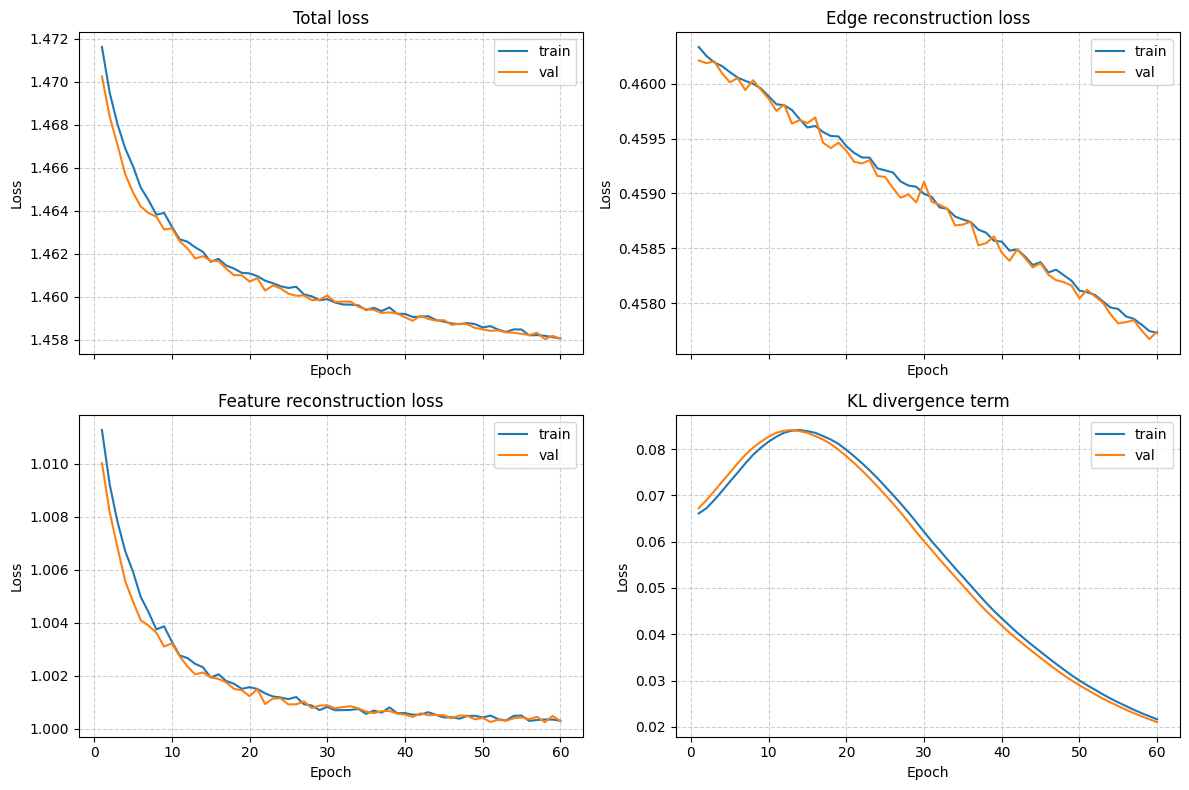

In [1]:
# File: plot_losses.py

import numpy as np
import matplotlib.pyplot as plt
import os

def plot_losses(loss_file: str, save_fig: bool = False):
    data = np.load(loss_file)

    # Extract arrays
    train_total = data["train_total"]
    val_total   = data["val_total"]
    train_edge  = data["train_edge"]
    val_edge    = data["val_edge"]
    train_feat  = data["train_feat"]
    val_feat    = data["val_feat"]
    train_kl    = data["train_kl"]
    val_kl      = data["val_kl"]

    epochs = np.arange(1, len(train_total) + 1)

    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
    axs = axs.ravel()

    axs[0].plot(epochs, train_total, label="train")
    axs[0].plot(epochs, val_total, label="val")
    axs[0].set_title("Total loss")
    axs[0].legend()

    axs[1].plot(epochs, train_edge, label="train")
    axs[1].plot(epochs, val_edge, label="val")
    axs[1].set_title("Edge reconstruction loss")
    axs[1].legend()

    axs[2].plot(epochs, train_feat, label="train")
    axs[2].plot(epochs, val_feat, label="val")
    axs[2].set_title("Feature reconstruction loss")
    axs[2].legend()

    axs[3].plot(epochs, train_kl, label="train")
    axs[3].plot(epochs, val_kl, label="val")
    axs[3].set_title("KL divergence term")
    axs[3].legend()

    for ax in axs:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()

    if save_fig:
        out_path = os.path.splitext(loss_file)[0] + "_curves.png"
        plt.savefig(out_path, dpi=150)
        print(f"Saved figure to {out_path}")
    else:
        plt.show()


if __name__ == "__main__":
    loss_path = r"D:\rebuttal2025\models\checkpoints\rg_vae_B1_losses.npz"
    plot_losses(loss_path, save_fig=False)
